# 用calspec画出不同散射次数的flux

## 统一版本，需要结合`caslepc散射代码.py`，先生成对应文件，才行

是否使用测试模式？输入 1 为测试（默认 te=1.000, tau=12.500），输入 0 为手动输入:  0 
请输入 te 值（如 0.1）:  0.8
请输入 tau 值（如 10）:  15
请输入要绘制的 nsca 值列表（如：0 1 2 -1，用空格分隔）:  3 10 50 100 400 500


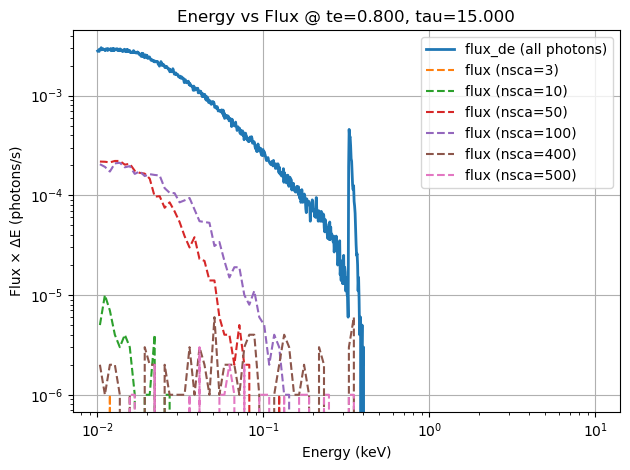

✅ 绘图完成


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import os

def load_dat_file(file_path):
    """读取二进制 .dat 文件并解析为 float64 数组"""
    if not os.path.exists(file_path):
        print(f"❌ 文件不存在: {file_path}")
        return None

    with open(file_path, "rb") as f:
        data = f.read()

    num_items = len(data) // 8
    return np.array(struct.unpack("<" + "d" * num_items, data))

# 🔁 测试模式或手动输入 te/tau
test_mode = input("是否使用测试模式？输入 1 为测试（默认 te=1.000, tau=12.500），输入 0 为手动输入: ")

if test_mode.strip() == "1":
    te_str = "1.000"
    tau_str = "12.500"
    print("测试模式启用：te=1.000, tau=12.500")
else:
    te_input = input("请输入 te 值（如 0.1）: ")
    tau_input = input("请输入 tau 值（如 10）: ")
    te_str = f"{float(te_input):.3f}"
    tau_str = f"{float(tau_input):.3f}"

# ✅ 构造路径
base_file_path = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth_10_6\data_calspec_1000"
sub_dir_flux = os.path.join(f"te_{te_str}_tau_{tau_str}", "calspec")
sub_dir_nsca = os.path.join(f"te_{te_str}_tau_{tau_str}", "calspec_nsca")

file_path_en = os.path.join(base_file_path, sub_dir_flux, "en.dat")
file_path_de = os.path.join(base_file_path, sub_dir_flux, "de.dat")
file_path_flux = os.path.join(base_file_path, sub_dir_flux, "flux.dat")

# ✅ 读取通用 energy/de 数据
en = load_dat_file(file_path_en)
de = load_dat_file(file_path_de)

if en is None or de is None:
    print("❌ energy 或 de 数据加载失败！程序终止。")
    exit()

# ✅ 读取 flux.dat 并绘制原始谱
flux = load_dat_file(file_path_flux)
if flux is not None:
    flux_de = flux * de
    plt.plot(en, flux_de, label="flux_de (all photons)", linewidth=2)

# ✅ 输入 nsca 列表
nsca_input = input("请输入要绘制的 nsca 值列表（如：0 1 2 -1，用空格分隔）: ").strip().split()
nsca_values = [x.strip() for x in nsca_input if x.strip() != ""]

# ✅ 循环读取并绘制每一个 flux_{nsca}.dat
for nsca in nsca_values:
    nsca_dir = os.path.join(base_file_path, sub_dir_nsca, nsca)
    file_path_flux_nsca = os.path.join(nsca_dir, f"flux_{nsca}sca.dat")
    file_path_de_nsca = os.path.join(nsca_dir, "de.dat")
    file_path_en_nsca = os.path.join(nsca_dir, "en.dat")

    flux_nsca = load_dat_file(file_path_flux_nsca)
    de_nsca = load_dat_file(file_path_de_nsca)
    en_nsca = load_dat_file(file_path_en_nsca)

    if flux_nsca is not None and de_nsca is not None and en_nsca is not None:
        flux_nsca_de = flux_nsca * de_nsca
        plt.plot(en_nsca, flux_nsca_de, label=f"flux (nsca={nsca})", linestyle='--')
    else:
        print(f"⚠️ 跳过 nsca={nsca}：数据不完整。")


# ✅ 图像展示
plt.xlabel("Energy (keV)")
plt.ylabel("Flux × ΔE (photons/s)")
plt.title(f"Energy vs Flux @ te={te_str}, tau={tau_str}")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ 绘图完成")


In [39]:
def compute_compton_y(te_keV, tau):
    """
    计算康普顿参数 y
    :param te_keV: 电子温度（单位 keV）
    :param tau: 光深（无量纲）
    :return: 康普顿 y 参数
    """
    # 常数
    k_B_keV = 1.0            # kT 单位为 keV，所以 k_B 被 absorb 掉
    m_e_c2_keV = 511.0       # 静止电子能量，单位 keV

    theta = te_keV / m_e_c2_keV  # 归一化温度 θ = kT/mc²

    y = 4 * theta * max(tau, tau ** 2)
    return y

def main():
    print("🧮 康普顿 y 参数计算器")
    try:
        te_input = float(input("请输入电子温度 Te (keV): "))
        tau_input = float(input("请输入光深 tau: "))
        y = compute_compton_y(te_input, tau_input)
        print(f"\n✅ 康普顿 y 参数 = {y:.6f}")
    except ValueError:
        print("❌ 输入无效，请输入数值。")

if __name__ == "__main__":
    main()


🧮 康普顿 y 参数计算器


请输入电子温度 Te (keV):  0.4
请输入光深 tau:  20



✅ 康普顿 y 参数 = 1.252446


## 高级版本，根据输入自动生成文件夹，自动画图，可以随意调节散射次数

输入 1 使用自动测试模式（te=0.800, tau=15.000, nsca=10 100 200 250 300 350），输入 0 手动输入:  0
请输入 te 值（如 0.1）:  0.8
请输入 tau 值（如 10）:  15
选择 nsca 输入模式：1-手动输入多个值，2-输入区间(start end step)，输入数字选择:  1
请输入要执行的 nsca 值列表（如：0 1 2 -1，用空格分隔）:  -225 -400


📁 创建目录: \\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth_10_6\data_calspec_1000\te_0.800_tau_15.000\calspec_nsca\-225
linear = 0
linear = 0
linear = 0
we are here
nsca = -225

📁 创建目录: \\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth_10_6\data_calspec_1000\te_0.800_tau_15.000\calspec_nsca\-400
linear = 0
linear = 0
linear = 0
we are here
nsca = -400



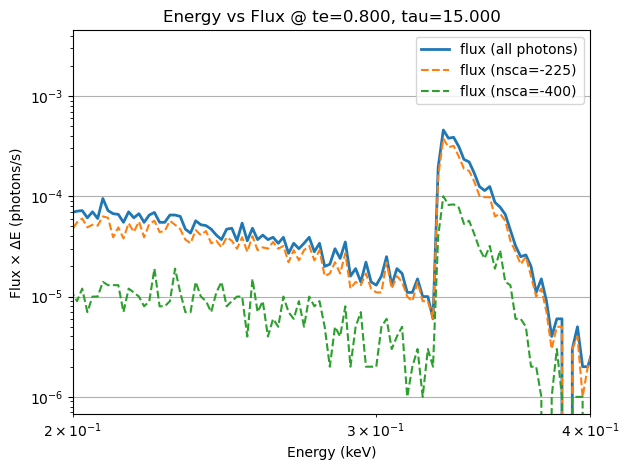

✅ 全流程执行并绘图完成！


In [51]:
import os
import subprocess
import time
import struct
import numpy as np
import matplotlib.pyplot as plt

def load_dat_file(path):
    if not os.path.exists(path):
        print(f"❌ 文件不存在: {path}")
        return None
    with open(path, "rb") as f:
        data = f.read()
    return np.array(struct.unpack("<" + "d" * (len(data)//8), data))

# 选择自动还是手动模式
mode = input("输入 1 使用自动测试模式（te=0.800, tau=15.000, nsca=10 100 200 250 300 350），输入 0 手动输入: ").strip()

if mode == "1":
    te_str = "0.800"
    tau_str = "15.000"
    nsca_values = ["10", "100", "200", "250", "300", "350"]
    print(f"自动模式: te={te_str}, tau={tau_str}, nsca={nsca_values}")
else:
    te_input = input("请输入 te 值（如 0.1）: ")
    tau_input = input("请输入 tau 值（如 10）: ")
    te_str = f"{float(te_input):.3f}"
    tau_str = f"{float(tau_input):.3f}"

    # nsca 输入模式选择
    mode_nsca = input("选择 nsca 输入模式：1-手动输入多个值，2-输入区间(start end step)，输入数字选择: ").strip()

    if mode_nsca == "1":
        nsca_input = input("请输入要执行的 nsca 值列表（如：0 1 2 -1，用空格分隔）: ").strip().split()
        nsca_values = [x.strip() for x in nsca_input if x.strip() != ""]
    elif mode_nsca == "2":
        range_input = input("请输入 nsca 区间参数，格式: start end step（例如：10 350 50）: ").strip().split()
        if len(range_input) != 3:
            print("❌ 输入格式错误，默认使用手动输入空格值。")
            nsca_input = input("请输入要执行的 nsca 值列表（如：0 1 2 -1，用空格分隔）: ").strip().split()
            nsca_values = [x.strip() for x in nsca_input if x.strip() != ""]
        else:
            start, end, step = map(int, range_input)
            nsca_values = [str(x) for x in range(start, end + 1, step)]
    else:
        print("❌ 未知模式，默认使用手动输入空格值。")
        nsca_input = input("请输入要执行的 nsca 值列表（如：0 1 2 -1，用空格分隔）: ").strip().split()
        nsca_values = [x.strip() for x in nsca_input if x.strip() != ""]

# 路径定义
base_dir_win = r"\\wsl.localhost\Ubuntu-22.04\home\hdw\data\monk\plot\warmcorona\test\test_smooth_10_6\data_calspec_1000"
base_dir_linux = f"/home/hdw/data/monk/plot/warmcorona/test/test_smooth_10_6/data_calspec_1000"
group_name = f"te_{te_str}_tau_{tau_str}"

output_base_win = os.path.join(base_dir_win, group_name, "calspec_nsca")
output_base_linux = f"{base_dir_linux}/{group_name}/calspec_nsca"

sphere_linux_path = f"/home/hdw/data/monk/plot/warmcorona/test/test_smooth_10_6/data/{group_name}/sphere"

# calspec 参数固定，ne emin emax
base_params = "-1000 0.01 10"

def run_calspec(nsca):
    sub_dir_win = os.path.join(output_base_win, nsca)
    os.makedirs(sub_dir_win, exist_ok=True)
    print(f"📁 创建目录: {sub_dir_win}")

    calspec_folder_linux = f"{output_base_linux}/{nsca}"

    command = (
        f"cd '{calspec_folder_linux}' && "
        f"/home/hdw/data/monk/monk_for_rhy/bin/calspec '{sphere_linux_path}' {base_params} {nsca}"
    )

    result = subprocess.run(["wsl", "bash", "-c", command], capture_output=True, text=True)

    if result.returncode != 0:
        print(f"❌ calspec 运行失败 (nsca={nsca})")
        print(result.stderr)
    else:
        #print(f"✅ calspec 执行完成 (nsca={nsca})")
        print(result.stdout)

# 依次运行所有 nsca
for nsca in nsca_values:
    run_calspec(nsca)

# 读取基础 calspec flux 文件绘图
calspec_dir = os.path.join(base_dir_win, group_name, "calspec")
en = load_dat_file(os.path.join(calspec_dir, "en.dat"))
de = load_dat_file(os.path.join(calspec_dir, "de.dat"))
flux = load_dat_file(os.path.join(calspec_dir, "flux.dat"))

if en is None or de is None or flux is None:
    print("❌ 基础数据缺失，无法绘图！")
    exit()

plt.plot(en, flux * de, label="flux (all photons)", linewidth=2)

# 读取并绘制每个 nsca 结果
for nsca in nsca_values:
    nsca_dir = os.path.join(output_base_win, nsca)
    file_flux = os.path.join(nsca_dir, f"flux_{nsca}sca.dat")
    file_en = os.path.join(nsca_dir, "en.dat")
    file_de = os.path.join(nsca_dir, "de.dat")

    en_n = load_dat_file(file_en)
    de_n = load_dat_file(file_de)
    flux_n = load_dat_file(file_flux)

    if en_n is None or de_n is None or flux_n is None:
        print(f"⚠️ 跳过 nsca={nsca}，数据不完整。")
        continue

    plt.plot(en_n, flux_n * de_n, linestyle="--", label=f"flux (nsca={nsca})")

plt.xlabel("Energy (keV)")
plt.ylabel("Flux × ΔE (photons/s)")
plt.title(f"Energy vs Flux @ te={te_str}, tau={tau_str}")
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.2, 0.4)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("✅ 全流程执行并绘图完成！")
